In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;  
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append('/Users/af/Work/code/mcmc/build')
#sys.path.append('/Users/af/Work/code/mcmc/debug')

import mcmc
#help(mcmc)
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


On 19 March, the Army was deployed to the city of Bergamo, the worst hit Italian city by the coronavirus, as the local authorities can no longer process the number of dead residents. The city's mayor Giorgio Gori said the true number of dead could be much higher than reported.[234] Army trucks transported bodies to crematoriums in several other cities, as cemeteries in the city were full.[235] On the following day, the Army was called in to assist the police forces in enforcing the lockdown.[236]

*On 20 March*, the Ministry of Health ordered tighter regulations on free movement. The new measures banned open-air sports and running, except individually and in close proximity of one's residence. Parks, playgrounds and public green were closed down. Furthermore, movement across the country was further restricted, by banning "any movement towards a residence different from the main one", including holiday homes, during weekends and holidays.[237]

____On 21 Marc____h, Conte announced further restrictions within the nationwide lockdown, by halting all non-essential production, industries and businesses in Italy, following the rise in the number of new cases and deaths in the previous days.[238] This measure had also been strongly asked for by multiple institutions, including trade unions, mayors, and regional presidents, as well as medical professionals, but was initially opposed by the industrialists.[239][240][241][242][243][244]

___On 24 March___, in a live-streamed press conference, Conte announced a new decree approved by the Council of Ministers. The decree imposed higher fines for the violation of the restrictive measures, and a regulation of the relationship between government and Parliament during the emergency. It included also the possibility of reducing or suspending public and private transport, and gave the regional governments power to impose additional restrictive regulations in their Regions for a maximum of seven days before being confirmed by national decree.[245][246]



March 11 — WHO Director-General Tedros Adhanom Ghebreyesus declares the global COVID-19 outbreak a pandemic. 


In the night between 7 and 8 March, the government approved a decree to lock down Lombardy and 14 other provinces in Veneto, Emilia-Romagna, Piedmont and Marche, involving more than 16 million people.[209] The decree "absolutely avoided any movement into and out of the areas" and, like the previous one, it provided sanctions of up to three months in prison for those who violated the lockdown.[210] It was possible to move into and out of the areas only for emergencies or "proven working needs", which must be authorised by the prefect.[211] The decree also established the closure of all gyms, swimming pools, spas and wellness centres. Shopping centres had to be closed on weekends, while other commercial activities could remain open if a distance of one metre between customers could be guaranteed.[212] The decree imposed the closure of museums, cultural centres and ski resorts in the lockdown areas and the closure of cinemas, theatres, pubs, dance schools, game rooms, betting rooms and bingo halls, discos and similar places in the entire country.[213] Civil and religious ceremonies, including funeral ceremonies, were suspended. All organised events were also suspended, as well as events in public or private places, including those of a cultural, recreational, sporting and religious nature, even if held in closed places.[214] This measure was described as the largest lockdown in the history of Europe,[215][216] as well as the most aggressive response taken in any region beyond China, and paralysed the wealthiest parts of the country as Italy attempted to constrain the rapid spread of the disease.[217][218]

Riots broke out in many penitentiaries throughout Italy after restrictions on conjugal visits were imposed by the government in the 8 March decree


___On 4 March___, the Italian government imposed the shutdown of all schools and universities nationwide for two weeks as the country reached 100 deaths from the outbreak.[205][206] The same day, the government ruled that all sporting events in Italy would be played behind closed doors until 3 April.[207]

___On 1 March___, the Council of Ministers approved a decree to organise the containment of the outbreak. In the decree, the Italian national territory was divided into three areas:[204]

A red zone (composed of the municipalities of Bertonico, Casalpusterlengo, Castelgerundo, Castiglione D'Adda, Codogno, Fombio, Maleo, San Fiorano, Somaglia and Terranova dei Passerini in Lombardy, and the municipality of Vò in Veneto), where the whole population is in quarantine.
A yellow zone (composed of the regions of Lombardy, Veneto and Emilia-Romagna), where social and sport events are suspended and schools, theatres, clubs and cinemas are closed.
The rest of the national territory, where safety and prevention measures are advertised in public places and special sanitisations are performed on means of public transport.


Feb. 28 — The World Health Organization raises the global risk of spread of COVID-19 from “high” to “very high.”


“This is a reality check for every government on the planet. Wake up. Get ready. This virus may be on its way, and you need to be ready,” says Dr. Michael Ryan, executive director of the WHO Health Emergencies Programme, during a press conference.

In recent days, 24 new cases originating from Italy have been reported in 14 countries, and 97 cases originating in Iran have been reported in 11 countries.



___On 22 February___, the government announced a new decree imposing the quarantine of more than 50,000 people from 11 different municipalities in Northern Italy.

<ErrorbarContainer object of 3 artists>

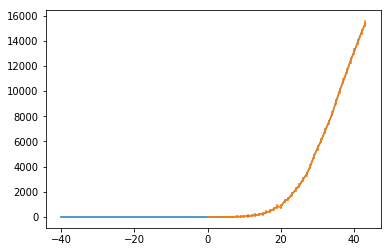

In [3]:
params = mcmc.DiseaseParams()
params.probLethalDailyWhenSeriousUntreated = 0.3
params.probSerious = 0.024 #unknown, higher for older population - should be possible to extract from Diamond Princess. 
#I think about 30 were serious... 30/700 would then be upper limit, so at most 5% for old people. 
#Conistency check: 6(factor below)*11(dead on diamond princess) = 66... okay, more than 30. So 10% serious for old people.
# this number is between 0.02 and 0.1. need to line search max likelihood

params.probLethal = params.probSerious/6 #out of 50~49 serious cases, 7 dead in Aachen study https://www.aerzteblatt.de/archiv/213454
params.probAsymp = 0.3
params.timeIncub = 6  #chinese like studies...
params.timeIncubSigma = 4

#obained to match median 4, IQR 7 from Aachen study https://www.aerzteblatt.de/archiv/213454
params.timeMildToSerious = 7.1 
params.timeMildToSeriousSigma = 13

#Drosten study https://www.medrxiv.org/content/10.1101/2020.03.05.20030502v1 
#: 9 patients, all virus present after 5 days of symptoms. Let's say then that chance shorter ~ 10%. 
# seroconversion early week 2 progressive decrease in viral load in samples. 10 days most gone. 
#let's take lognormal with 5 at 10% CDF and 10 at 90% CDF 
params.timeMildDuration = 7.4 
params.timeMildDurationSigma = 2

# Aachen Median acht Tage (IQR 5–11) for all, including most that did not die. 
# This is longer with larger spread than the recovered group. We choose Median 8.6, IQR 6.6 to get 
params.timeSeriousToDeath = 10
params.timeSeriousToDeathSigma = 6

# less important: 
# Aachen Median 7 Tage [IQR 6–11])
params.timeSeriousToRecovered = 8
params.timeSeriousToRecoveredSigma = 4.5

nPop = 60000000
nPredictDays = 60
maxdelay = 40

#testdays = np.arange(60)

#starting at 21 feb 
deaths_data = np.array([1,2,3,7,10,12,17,21,29,34,52,79,107,148,197,233,366,463,631,827,827,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915, 14681, 15362 ])
#nPop/(1+np.exp(-(testdays-20)*0.2))*0.0015

deaths_past = np.zeros(maxdelay + deaths_data.size)
deaths_past[maxdelay:] = deaths_data
#keep the relative error low at 1%. if all measurements were independent it would be low.
#but errors even out in time mostly - here we assume a tiny fraction of cases does not 
#besides the constant 

#shot noise: every delta has sigma = sqrt(delta). day i var is cumsum of sigma^2=delta, so the original total. 
#additionally, we assume per day 10 deaths may go unnoticed early in the first two weeks - systematic error... 
#we could also assume a percentage of delta per day is a random added error, but these are not independent and even out late
#while not important initally. 
shotnoise = np.sqrt(deaths_data)
unnoticed = 10*np.ones(deaths_data.shape)
unnoticed[14:] = 0
deaths_error = np.cumsum(unnoticed) + shotnoise
time_past = np.arange(deaths_past.size)-maxdelay
time_data = np.arange(deaths_data.size)
time_all = np.arange(deaths_past.size+nPredictDays)-maxdelay

plt.plot(time_past, deaths_past)
plt.errorbar(time_data, deaths_data, deaths_error)


In [4]:

deathdata = np.zeros((2, deaths_data.size))
deathdata[0, :] = deaths_data
deathdata[1, :] = deaths_error

discontdays = np.array([1, 9, 12, 29]) #removed 32 
discontvals = np.array([1,0.6,0.5,0.4])

discontdata = np.zeros((3, discontdays.size))
discontdata[0, :] = discontdays
discontdata[1, :] = discontvals
discontdata[2, :] = discontvals # > 0 means sample this (else fixed)
#discontdata[2, 1] = -1         # < 0 means fix 

data = mcmc.DiseaseData(deathdata,  discontdata)

data.initialBetaMild = 2
data.initialBetaHigh = 10
data.initialDelay = 23
data.fixBehaviorInAdvance = 10
#avg = mcmc.AvgDiseaseTrajectory(params)

covid = mcmc.DiseaseSpread(data, params, nPop, 7500, 100.0, maxdelay, nPredictDays)

state = mcmc.State()
state.add(covid)
smooth = mcmc.SmoothnessPrior("behavior",  50, deaths_data.size-data.fixBehaviorInAdvance)
state.add(smooth)

print(state.getAll())


{'asymptomatic': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'behavior': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'betaHigh': [10.0], 'betaMild': [2.0], 'capacity': [7500.0, 7500.0, 7500.0, 7

In [ ]:
ls = []
for i in range(100):
    gd = mcmc.GradientDecent(state)
    state.test(0.01)
    gd.learningRate = 0
    gd.decent()
    print(state.getAll()["delay"])
    ls.append(state.loglike())

plt.plot(ls)

In [ ]:


#prior = mcmc.SmoothnessPrior("behavior", 1000, 0, deaths_data.size)
#state.add(prior)



gd = mcmc.GradientDecent(state)





loglikeold = state.loglike()

#gd.decent()


#state.force_bounds()

#print(state.getAll().get("behavior"))




print(loglikeold)
gd.learningRate =  0.1e-5/np.abs(loglikeold)

isWorking = True
nNotWorking = 0


for i in range(10000):
    
    gd.learningRate =  (1+nNotWorking/10)*0.1e-5/np.abs(loglikeold)
    if gd.learningRate > 5e-13:
        gd.learningRate = gd.learningRate * 0.1
    if gd.learningRate > 5e-12:
        gd.learningRate = gd.learningRate * 0.1
  
#     for j in range(100):
    for j in range(1):
        gd.decent()
        state.force_bounds()
        
    loglikenew = state.loglike()
    relimprov = loglikenew/loglikeold-1
    
    if np.remainder(i,100) == 0:
        print("loglike = {}   rate = {}  num of successive stuck steps {}".format(loglikenew, gd.learningRate, nNotWorking))
        
    if np.abs(relimprov) < 0.003:
        if isWorking == False:
            nNotWorking = nNotWorking + 1 
        
        gd.perturb(1e-5*nNotWorking)
        state.force_bounds()
        isWorking = False
    else:
        isWorking = True
        nNotWorking = 0
        
#          gd.learningRate =   gd.learningRate * 1.02
        
    
#     if np.abs(relimprov) < 0.01:
#         gd.learningRate = gd.learningRate * 1.1
    loglikeold = loglikenew

print(loglikeold)



-5754318.991373584
loglike = -5754318.99137358   rate = 1.7378251040637828e-13  num of successive stuck steps 0
loglike = -2968.3308887167823   rate = 3.234539933038882e-11  num of successive stuck steps 86
loglike = -2953.4492950014064   rate = 2.438226375890609e-11  num of successive stuck steps 62
loglike = -2933.698558192503   rate = 2.5564908810498085e-11  num of successive stuck steps 65


In [5]:
target = mcmc.CoolingTarget(10)
#target = mcmc.SimpleTarget()

state.sharedDependencyMaxDepth = 5
    
target.set_posterior(state)

chain = mcmc.Chain(target, 0)




chain.computeMean = True
chain.recordSamples = True

#chain.run(500000,500,500,50)
#chain.run(20,0,20,1)
#chain.run(200000,200,200,50)
#c.run(10,0,20,1)

chain.run(0,0,40,1)

print(chain.getLoglikes())


[-105.21480715  -80.76047075  -25.69107558  -19.08912608  -18.91371676
  -18.66153946  -18.43846442  -18.12870315  -18.10253123  -17.80349761
  -17.92207137  -17.79009173  -17.61524683  -17.66829922  -17.45183735
  -17.20246039  -16.71544552  -16.51754471  -16.45716554  -16.32348847
  -16.26250161  -16.17821311  -16.10820384  -16.01813603  -15.75661946
  -15.65507693  -15.49244374  -15.47351133  -15.31246399  -15.20492796
  -15.11942058  -15.01530139  -14.91363906  -14.88723356  -14.84323755
  -14.81573083  -14.78428941  -14.74976564  -14.72366058]


In [6]:
print(state.getAll()["delay"])
print(chain.getMean("delay"))

[22.00506145132579]
[22.00735855]


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.88683831e-09,
        8.49302271e-07,  7.65238633e-06,  2.85333519e-05,  7.28903802e-05,
        1.51701789e-04,  2.88211237e-04,  5.19926274e-04,  9.16943453e-04,
        1.59991458e-03,  2.76429333e-03,  4.73198273e-03,  8.07155196e-03,
        1.37389493e-02,  2.33625204e-02,  3.96836452e-02,  6.73438025e-02,
        1.14251659e-01,  1.93803213e-01,  3.28712679e-01,  5.57478514e-01,
        9.45376585e-01,  1.60312599e+00,  2.71846679e+00,  4.60966127e+00,
        7.78129007e+00,  1.28682133e+01,  2.06133194e+01,  3.19555791e+01,
        4.83196483e+01,  

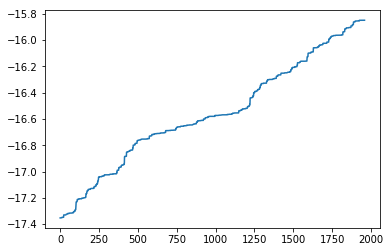

In [7]:
plt.plot(chain.getLoglikes()[60:])
chain.getMean("dead")

(2019, 144)


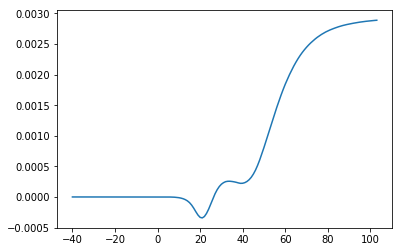

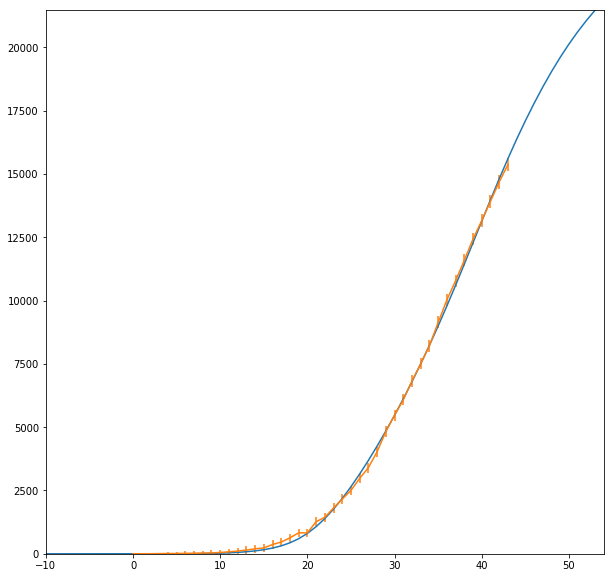

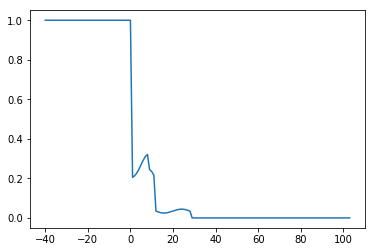

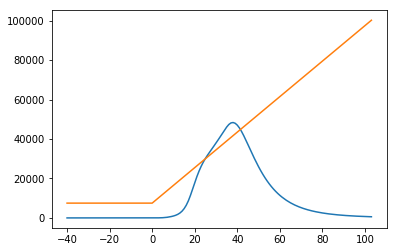

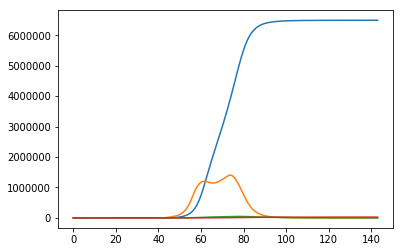

In [24]:
print(chain.getSamples("dead").shape)



plt.plot(time_all, chain.getMean("dead")[:] - np.mean(chain.getSamples("dead"),0))
plt.show()

plt.figure(figsize=(10,10))
plt.plot(time_all, chain.getSamples("dead")[-1,:])
#for i in range(110): 
#    plt.plot(time_all, chain.getSamples("dead")[-1-35*i,:])

# plt.plot(time_all, chain.getSamples("dead")[-1,:])
# plt.plot(time_all, chain.getSamples("dead")[-10,:])
# plt.plot(time_all, chain.getSamples("dead")[-35,:])
# plt.plot(time_all, chain.getSamples("dead")[-65,:])
# plt.plot(time_all, chain.getSamples("dead")[-95,:])
# plt.plot(time_all, chain.getSamples("dead")[-125,:])
# plt.plot(time_all, chain.getSamples("dead")[-155,:])
# plt.plot(time_all, chain.getSamples("dead")[-250,:])
# plt.plot(time_all, chain.getSamples("dead")[-350,:])
# plt.plot(time_all, chain.getSamples("dead")[-650,:])
# plt.plot(time_all, chain.getSamples("dead")[-950,:])
# plt.plot(time_all, chain.getSamples("dead")[-1250,:])
# plt.plot(time_all, chain.getSamples("dead")[-1550,:])
plt.errorbar(time_data, deaths_data, deaths_error)
plt.xlim([-10, deaths_data.size+10])

lims = plt.gca().get_xlim()
i = np.where( (time_all > lims[0]) &  (time_all < lims[1]) )[0]
plt.gca().set_ylim( chain.getMean("dead")[i].min(), chain.getMean("dead")[i].max() )

plt.show()


plt.plot(time_all, chain.getMean("totalBehavior"))
#plt.plot(time_all, chain.getMean("behavior"))


#plt.plot(time_all, chain.getSamples("totalbehavior")[-1,:])
#plt.plot(time_all, chain.getSamples("totalbehavior")[-100,:])
#plt.plot(time_all, chain.getSamples("totalbehavior")[-800,:])

plt.show()
 
    
plt.show()
plt.plot(time_all, chain.getMean("serious"))
plt.plot(time_all, chain.getMean("capacity"))
plt.show()
plt.plot(chain.getMean("recovered"))
plt.plot(chain.getMean("mild"))
plt.plot(chain.getMean("serious"))
plt.plot(chain.getMean("dead"))


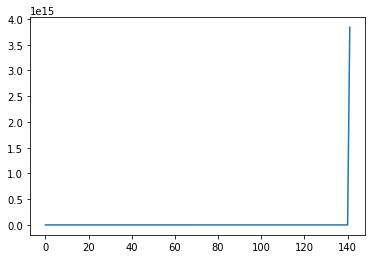

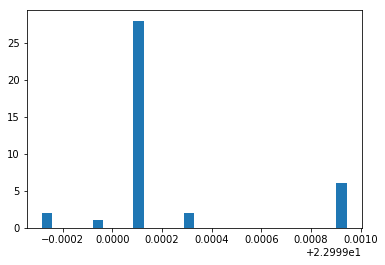

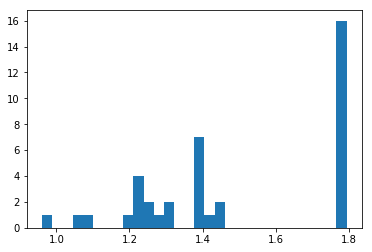

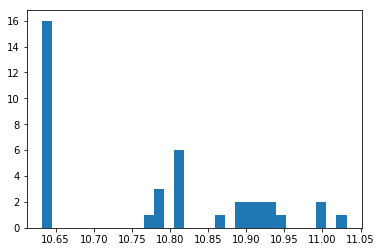

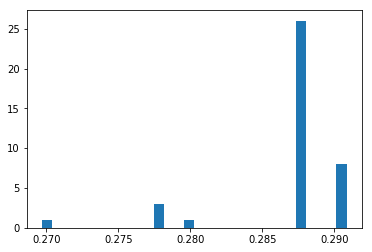

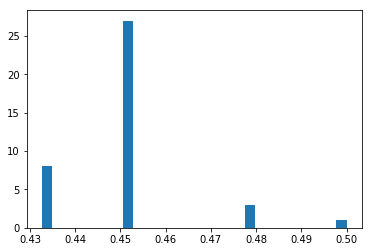

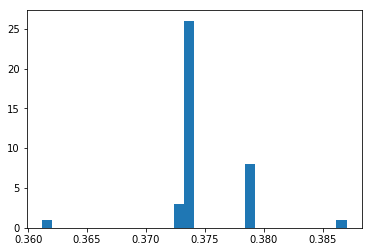

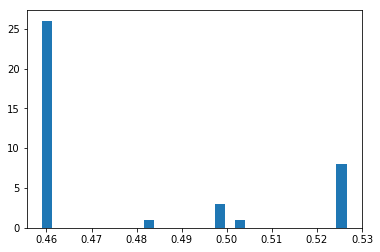

IndexError: index 4 is out of bounds for axis 1 with size 4

In [8]:


plt.plot()
plt.plot(np.var(chain.getSamples("dead"),0)**(0.5))
plt.show()

# pcf = lambda disvals: np.piecewise(time_all, [time_all < discontdays[0] ] + [ np.logical_and(discontdays[i] <= time_all, time_all < discontdays[i+1]) for i in np.arange(discontdays.size-1)] + [time_all >= discontdays[-1]], [1] + list(disvals))



# plt.plot(time_all, steps)
# plt.plot(time_all, chain.getMean("behavior"))
# plt.plot(time_all, steps*chain.getMean("behavior"))
# plt.show()

plt.hist(chain.getSamples("delay"),30)
plt.show()
plt.hist(chain.getSamples("betaMild"),30)
plt.show()
plt.hist(chain.getSamples("betaHigh"),30)
plt.show()
plt.hist(chain.getSamples("discontinuousVals")[:,0],30)
plt.show()
plt.hist(chain.getSamples("discontinuousVals")[:,1],30)
plt.show()
plt.hist(chain.getSamples("discontinuousVals")[:,2],30)
plt.show()
plt.hist(chain.getSamples("discontinuousVals")[:,3],30)
plt.show()
plt.hist(chain.getSamples("discontinuousVals")[:,4],30)
plt.show()

In [ ]:
plt.hist2d(chain.getSamples("discontinuousVals")[:,0],chain.getSamples("discontinuousVals")[:,2],(30,30))

In [ ]:
nDays = 60
dead = np.zeros(nDays)
rec = np.zeros(nDays)
mild = np.zeros(nDays)
serious = np.zeros(nDays)
asymp = np.zeros(nDays)
incub = np.zeros(nDays)
inf1 = np.zeros(nDays)

for i in np.arange(nDays):
    dead[i] = avg.getDead(i)
    rec[i] = avg.getRecovered(i)
    mild[i] = avg.getMild(i)
    serious[i] = avg.getSerious(i)
    asymp[i] = avg.getAsymptomatic(i)
    inf1[i] = avg.getInfectious(i)
    incub[i] = avg.getIncubating(i)
    

    #

plt.plot(np.cumsum(rec))
np.sum(incub)

In [ ]:
foo = np.array(avg.recovered) + np.array(avg.dead)-1
print(avg.dead[-1])
fig = plt.figure(figsize=(20,10))
plt.plot(np.array(avg.dead))

In [ ]:
np.sum(np.array(avg.incubating[0]) )

In [ ]:
plt.plot(time_all, pcf([0.9,0.8,0.7, 0.6, 0.5]))

In [ ]:
list(discontdays)